# Plotting Related $pK_a$ Values

We can see if one set of $pK_a$ values correlates with another. Does a series of substituted phenols correlate with a series of substituted benzoic acids? Let's find out.

Below is an example Jupyter notebook providing a walk through of my own workflow.

## Step 1: Find some data sets.

I looked in the class information for lesson 5 and at the end of the page was a list of $pK_a$ data sets.  I picked through them looking for substituted phenol systems and substituted benzoic acids. In the lengthy [Williams $pK_a$ data set](https://organicchemistrydata.org/hansreich/resources/pka/) I found lots of possibilities.  On page 7 are listed many values for substituted benzoic acids and on page 9 there is a corresponding list for phenols. I chose to use only *meta* and *para* substituents to avoid any extra steric affects that may be present in *ortho* systems.

## Step 2: Type in the Data

I entered the data in a text file. The text file is reproduced below.  I saved the file as ```correlation.csv```.

```
Substituent,   PhCOOH,    Phenol
H,             4.21,      9.95
m-Br,          3.81,      9.11
m-CH3,         4.24,      10.08
m-CH3O,        4.09,      9.65
m-Cl,          3.83,      9.02
m-CN,          3.6,       8.61
m-F,           3.87,      9.28
m-NO2,         3.45,      8.35
p-Br,          4.00,      9.34
p-CH3,         4.34,      10.19
p-CH3O,        4.47,      10.2
p-Cl,          3.99,      9.38
p-CN,          3.55,      7.95
p-F,           4.14,      9.95
p-NO2,         3.44,      7.14
```

## Step 3: Visualize the Data
I will make a quick plot of the data and see if it looks like there is a correlation.

*Note: Initially the commands kept crahing out with an "index error" because the text indexes "PhCOOH" and "Phenol" were not being recognized. I eventually figured out that all the spaces in my csv file were being included in the imported data set. I [looked up the ```pandas.read_csv``` command online](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) and found the* ```skipinitialspace``` *parameter. I used it and that solved my problem.*

In [2]:
### Note: lines that begin with the "#" symbol are comments

### Set the name and location of the data file. This might be the only thing you ever need to change in a notebook

file_path = ""
file_name = "Correlation.csv"  

### import the function libraries and sublibraries that we will be using.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt      # load the optimize sublibrary from scipy
import scipy.stats as stats       # load the stats sublibrary from scipy

############################
### Set global variables ###
############################

data_path = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_08/data/"
image_path = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_08/images/"

github_data_location = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"
github_styles_location = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"

#################################
### Read and display data set ###
#################################

### read in the selcted data file as a dataframe named "df"

df = pd.read_csv(data_path+file_name, skipinitialspace=True) 

display(df)

,Substituent,PhCOOH,Phenol
0,H,4.21,9.95
1,m-Br,3.81,9.11
2,m-CH3,4.24,10.08
3,m-CH3O,4.09,9.65
4,m-Cl,3.83,9.02
5,m-CN,3.60,8.61
6,m-F,3.87,9.28
7,m-NO2,3.45,8.35
8,p-Br,4.00,9.34
9,p-CH3,4.34,10.19


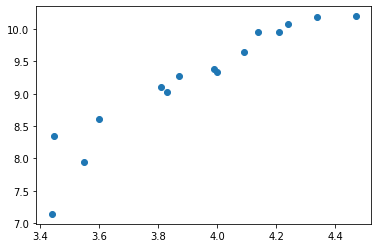

In [17]:
### select data for the x,y plot
### This is another place where you may need to make changes in notebooks.
### Not all data sets have the same column labels.

y = df['Phenol']
x = df['PhCOOH']

### plot the x-y data using a "circle" symbol
### Try ".", "^", "s", "D", "*" and "x" for fun 

plt.plot(x,y,"o")
plt.show()

## Step 4: Investigate the Data

There was a general correlation in the plot above. There were some outliers at the lower left corner.  I looked into them and observed that they were para-substituents that were resonance electron acceptors. I decided to plot the para substituents separately from the meta substituents. See the plot below. the meta substituents displayed a very strong correlation.  the para substituents showed a correlation, just not as good. Do para substituents have a different effect in some cases? Yes, they do. Compare resonace electron sharing of the negative charge for the anions of nitrobenzoate and nitrophenoxide. 

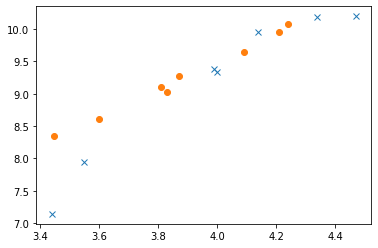

In [18]:
### The para-substituents are in positions 8 to 14 in the data list
### Python addresses arrays by slicing before the positions selected.
### e.g.: ...5 6 7 | 8 9 10 11 12 13 14 | 15
### To get data at positions 8 through 14 we slice at 8 and 15. (You'll get used to it).

y = df[8:15]['Phenol']  
x = df[8:15]['PhCOOH']

### plot the x-y data using an "x" symbol

plt.plot(x,y,"x")  

### The meta substituents are in positions 0 through 7.
### So address these positions as slices before position 0 and 8
### e.g. | 0 1 2 3 4 5 6 7 | 8 9...

y = df[0:8]['Phenol']
x = df[0:8]['PhCOOH']

### plot the x-y data using a "circle" symbol
 
plt.plot(x,y,"o")  

### write the plot out as an image. Delete the comment "#" to use the command.

#plt.savefig("fig.pdf") 

### show the plot in this notebook and clear the figure

plt.show() 


## Step 5: Make it Fancy

Why would you do this? The above plot is clear and professional in appearance and is good enough for any report that you may choose to use it in. 

However, if you have the time (and only if you have truely extra free time that you would either spend doomscrolling Hurricane disaster images or making fancy plots) then you may want to look at how some of my other notebooks styled the plots. The [Math With Python book](https://blinkletter.github.io/MathWithPython/) \[via GitHub\] is a good place to start.